In [155]:
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

9


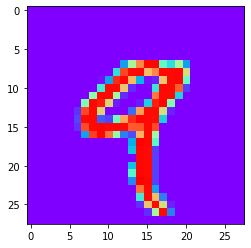

In [36]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 4
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='rainbow')

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [171]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
input_shape = (28, 28, 1)

X_test, X_val, y_test, y_val  = train_test_split(X_test,y_test,test_size = 0.5, random_state=41)

y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)

enc=OneHotEncoder()
y_test = enc.fit_transform(y_test).toarray()
y_train = enc.transform(y_train).toarray()
y_val = enc.transform(y_val).toarray()

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten


# def get_model(k1=16, metrics=['accuracy']):

#     model = Sequential()
#     model.add(Conv2D(k1, 3, activation='relu', input_shape=input_shape))
#     model.add(Conv2D(k1*2, 3, activation='relu'))    
#     model.add(MaxPooling2D(3))
#     model.add(Flatten())
#     model.add(Dense(10, activation='softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=metrics)
#     return model

In [41]:
get_model()

In [172]:
def get_model_bis(c1=16,c2=32, k1=10, metrics=['accuracy']):

    model = Sequential([
                        Conv2D(c1,kernel_size=3,input_shape=input_shape),
                        Activation('relu'),
                        Conv2D(c2,kernel_size=3),
                        Activation('relu'),
                        MaxPooling2D(3),
                        Flatten(),
                        Dense(k1),
                        Activation('softmax')])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)
    return model


In [173]:
model1 = get_model_bis()

In [174]:
model1.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
activation_38 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)              

In [178]:
history = model1.fit(X_train,y_train, epochs=25, batch_size=128, validation_data=(X_val, y_val))



Train on 60000 samples, validate on 5000 samples
Epoch 1/25
60000/60000 [==============================] - 38s 636us/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0697 - val_accuracy: 0.9832
Epoch 2/25
60000/60000 [==============================] - 37s 622us/step - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.0652 - val_accuracy: 0.9852
Epoch 3/25
60000/60000 [==============================] - 40s 667us/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0652 - val_accuracy: 0.9856
Epoch 4/25
60000/60000 [==============================] - 38s 639us/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.0805 - val_accuracy: 0.9852
Epoch 5/25
60000/60000 [==============================] - 39s 644us/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0809 - val_accuracy: 0.9832
Epoch 6/25
60000/60000 [==============================] - 40s 661us/step - loss: 0.0168 - accuracy: 0.9949 - val_loss: 0.0714 - val_accuracy: 0.9868
Epoch 7/25
60000/60000 [==============================] -

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


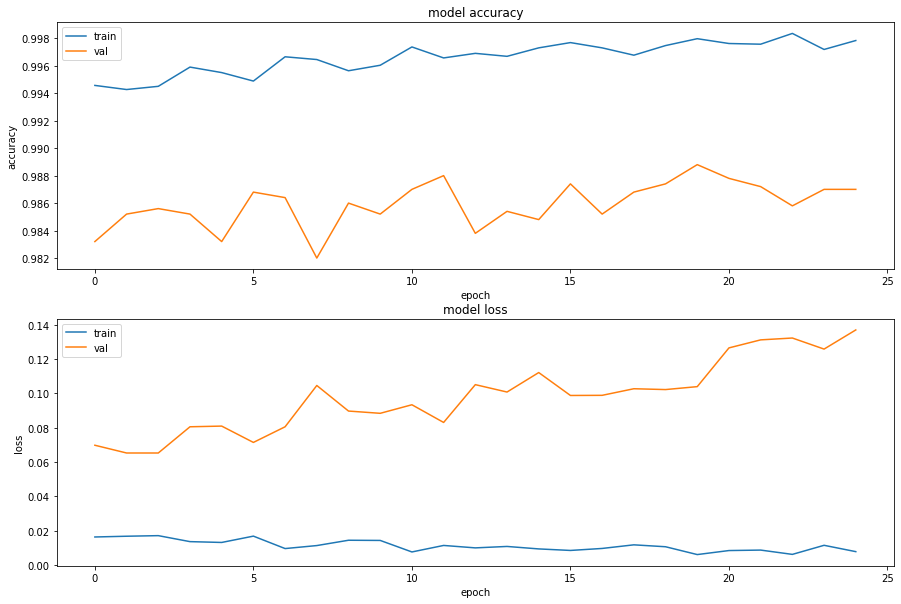

In [180]:
import matplotlib.pyplot as plt

print(history.history.keys())  



plt.figure(1,figsize=(15,10))  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  